In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [96]:
from graph import *
from visualize import *
from breadth_first_search import *
from collections import deque
import random, sympy

In [97]:
def print_tree(graph):
    dot = get_dot_format(graph)
    return graphviz.Source(dot)

In [98]:
def map_search_tree(graph,source):
    reached = breadth_first_search(graph,source)
    search_tree_edges = []
    for keys,values in reached.items():
            temp = [values,keys]
            search_tree_edges.append(temp)
    search_tree_edges.pop(0)
    search_tree = Graph(reached.keys(),search_tree_edges)
    search_dot = get_dot_format(search_tree)
    return graphviz.Source(search_dot)

In [99]:
def count_components(graph):
    components = [[]]
    tested = set()
    for v in graph.get_vertices():
        for i in range(len(components)+1):
            if v in tested:
                continue
            else:
                if v not in components[i-1]:
                    reached = breadth_first_search(test1, v)
                    components.append(reached)
                    tested.update(list(reached.keys()))
    return(len(components) - 1)

Components:  4


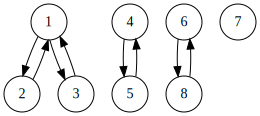

In [100]:
v1 = {1,2,3,4,5,6,7,8}
E1 = [
    [1,2],
    [2,1],
    [1,3],
    [3,1],
    [4,5],
    [5,4],
    [6,8],
    [8,6]
]

test1 = Graph(v1,E1)
print('Components: ',count_components(test1) )
print_tree(test1)

# Complexity for count_components
In an undirected graph, each component is comprised of unique vertices and edges.
Therefore, each component will contain M Vertices and L edges:
$$\sum_{j=1}^{M}V'_j + \sum_{k=1}^{L}E'_j$$
And for a given number of components, D, the total sum of all vertices and edges is equal to:
$$ V + E = \sum_{i=1}^{D}C_i ( \sum_{j=1}^{M}V'_j + \sum_{k=1}^{L}E'_j) $$

In [93]:
def count_components_alt(graph):
    '''
    In an undirected graph, all connected vertices can be reached from each other. That is, if v and u are in the 
    undirected graph G, v and u will always be able to reach other. Therefore, a BFS performed on v will include all
    other vertices within the component.
    
    The main loop will continue D times for each component, C.
    The body of the loop will take O(V'+E') due to BFS.
    However, V' and E' consitute the unique vertices and edges of that component, and thus those vertices and
    edges will only be searched once (during the loop iteration of the component they belong to).
    Since V + E equals the sum number of components composed of the sum of the vertices and edges unique to 
    that component, the overall complexity of the loop is O(|V| + |E|).
    
    Another way to think about is that since each component has its own edges and vertices, the total
    complexity of running BFS on each component is the same complexity as running it on an equivalent graph
    with the same num
    
    Performance: O(V + E)
    '''
    components = [] 
    vertices = graph.get_vertices() # O(|V|)
    if len(vertices) == 0:
        return 0

    # Use dictionary as a hashmap to store vertices instead of a list( O(1) vs O(n) when deleting items).
    # Since each vertex number is unique, hash function is key=value=vertex number.
    v = dict()
    while vertices:
        vert = vertices.pop()
        v[vert] = vert

    # While some vertices remain unsearched:
    # 1. Get random vertex from hash
    # 2. Perform BFS on that vertex
    # 3. Add reached as a new entry to the components list
    # 4. Delete all items in reached from hashmap
    while v: # O(C)
        s = v.popitem()[0] # O(1) https://www.ics.uci.edu/~brgallar/week8_2.html
        reached = breadth_first_search(graph,s) #O (V'+E') 
        reached = list(reached.keys()) #O(V')
        components.append(reached) #O(1)
        for u in reached: # O(V')
            if u == s: # s already popped
                continue
            else:
                v.pop(u) #O(1) #removes 
    return len( components )

In [94]:
print( count_components_alt(test1))

4


Components:  3


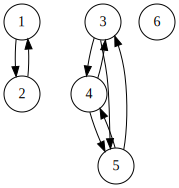

In [9]:
test2 = Graph({1,2,3,4,5,6},[])
test2.add_edge((1,2))
test2.add_edge((2,1))
test2.add_edge((3,4))
test2.add_edge((4,3))
test2.add_edge((4,5))
test2.add_edge((5,4))
test2.add_edge((3,5))
test2.add_edge((5,3))
print('Components: ', count_components(test2))
print_tree(test2)

In [10]:
ve = test2.get_vertices()
de = dict()
for i in range(len(ve)):
    a = ve.pop()
    de.update({a:0})


In [51]:
a = {1:2,3:4}
a.fromkeys(1)

TypeError: 'int' object is not iterable

In [66]:
person = {'name': 'Phill', 'age': 22, 'salary': 3500.0}

result = person.popitem()
print('person = ',person)
print('Return Value = ',result.pop(1))

person =  {'name': 'Phill', 'age': 22}


AttributeError: 'tuple' object has no attribute 'pop'

In [72]:
a = {1:2,3:4}
b = a.popitem()
print(b[1])

4
